In [ ]:
# default_exp visualizations

In [ ]:
#export
import matplotlib.pyplot as plt
import numpy as np

def plot_pvals(result_df):
    pvals = result_df["peptide_pval"].to_list()
    plt.hist(pvals,99,cumulative=True,density=True, histtype='step')
    x = np.linspace(0,1,100)
    plt.plot(x, x)
    plt.show()

In [ ]:
#export
from scipy.stats import norm
import matplotlib.pyplot as plt

def plot_bgdist(bgdist):
    fc2counts_rescaled = tranform_fc2count_to_fc_space(bgdist.fc2counts, bgdist.cumulative[-1],1/100.0)

    plt.bar(list(fc2counts_rescaled.keys()), fc2counts_rescaled.values(),width=0.01,color='g')
    axes2 = plt.twinx()
    x = np.linspace(-4, 4, 1000)
    axes2.plot(x, norm.pdf(x, 0, bgdist.SD)/1.15)
    axes2.set_ylim(0.0, 0.4)
    plt.show()

def tranform_fc2count_to_fc_space(fc2counts, num_fcs, rescale_factor):
    fc2counts_fcscales = {}
    for fc, count in fc2counts.items():
        fc2counts_fcscales[fc*rescale_factor] = count/num_fcs

    return fc2counts_fcscales

In [ ]:
#export
import matplotlib.pyplot as plt
from scipy import stats

def plot_betweencond_fcs(df_c1_normed, df_c2_normed, get_median):
    both_idx = df_c1_normed.index.intersection(df_c2_normed.index)
    df1 = df_c1_normed.loc[both_idx]
    df2 = df_c2_normed.loc[both_idx]
    if get_median:
        df1 = df1.median(axis = 1, skipna = True).to_frame()
        df2 = df2.median(axis = 1, skipna = True).to_frame()
    for col1 in df1.columns:
        for col2 in df2.columns:
            diff_fcs = df1[col1].to_numpy() - df2[col2].to_numpy()
            mode = stats.mode(diff_fcs, nan_policy='omit')[0][0]
            median = np.nanmedian(diff_fcs)
            #plt.axvline(mode, color = 'blue')
            plt.axvline(median, color = 'red')
            plt.hist(diff_fcs,99,density=True, histtype='step')
    plt.show()

In [ ]:
#export
import matplotlib.pyplot as plt
from scipy import stats
import itertools

def plot_withincond_fcs(df, xlim = None):
    combs = list(itertools.combinations(df.columns, 2))
    for cpair in combs:
        col1 = cpair[0]
        col2 = cpair[1]
        diff_fcs = df[col1].to_numpy() - df[col2].to_numpy()
        mode = stats.mode(diff_fcs, nan_policy='omit')[0][0]
        median = np.nanmedian(diff_fcs)
        #plt.axvline(mode, color = 'blue')
        #plt.axvline(median, color = 'red')
        plt.hist(diff_fcs,99,density=True, histtype='step')
        plt.xlabel("log2 peptide fcs")
        
    if xlim is not None:
        plt.xlim(xlim) 
    plt.show()

In [ ]:
from scipy import stats
mode = stats.mode([1,3,4,5,6,7,8,4,3,2,46,1,1,1])[0]
print(mode)

[1]


In [ ]:
#export
import matplotlib.pyplot as plt
def scatter_df_columns(merged_df, log_axes = False):
    col = (0.2, 0.4, 0.6, 0.1)
    ref_columns = list(filter(lambda x : "_ref" in x, merged_df.columns.to_list())) #filter the reference columns from the merged df

    for ref in ref_columns:
        compare = ref.replace("_ref", "")
        ax_p = merged_df.plot.scatter(x=ref,y=compare, color = col)
        corr = merged_df[ref].corr(merged_df[compare])
        plt.title(f"{ref} vs. {compare} corr {corr}")
        x = np.linspace(0,merged_df[ref].max(),100)
        plt.plot(x, x)
        if log_axes:
            plt.xscale('log')
            plt.yscale('log')
        plt.show()

In [ ]:
#export
import matplotlib.pyplot as plt
def plot_cumhist_dfcols(merged_df):
    col = (0.2, 0.4, 0.6, 0.4)
    ref_columns = list(filter(lambda x : "_ref" in x, merged_df.columns.to_list())) #filter the reference columns from the merged df

    for ref in ref_columns:
        compare = ref.replace("_ref", "")
        plt.hist(merged_df[ref], 100, density=True, histtype='step', label='reference')
        plt.hist(merged_df[compare], 100, density=True, histtype='step',label='compare')
        corr = merged_df[ref].corr(merged_df[compare])
        plt.title(f"{ref} vs. {compare} corr {corr}")
        plt.show()

In [ ]:
#export
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
def compare_peptid_protein_overlaps(protein_ref, protein_comp, peptide_ref, peptide_comp):
    protIDs_ref = set(protein_ref["protein"].to_list())
    protIDs_comp = set(protein_comp["protein"].to_list())
    venn2([protIDs_ref, protIDs_comp], ('protIDs_ref', 'protIDs_comp'))
    plt.show()
    pepIDs_ref = set(peptide_ref["peptide"].to_list())
    pepIDs_comp = set(peptide_comp["peptide"].to_list())
    venn2([pepIDs_ref, pepIDs_comp], ('pepIDs_ref', 'pepIDs_comp'))
    plt.show()

In [ ]:
#export
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fold_change(df, key1, key2):
    to_plot = df.copy()
    to_plot[f'Ratio ({key1}/{key2})'] = np.log2(to_plot[key1] / to_plot[key2])
    to_plot[f'Inten_{key1}'] = np.log10(to_plot[key1])

    species = 'Human'
    val = to_plot.loc[to_plot['species']==species, f'Ratio ({key1}/{key2})'].values
    val = val[~np.isnan(val)&~np.isinf(val)&~np.isneginf(val)]
    print(f'Species={species}, n={len(val)}, median={np.median(val)}, dev={np.std(val)}')
    species='Ecoli'
    val = to_plot.loc[to_plot['species']==species, f'Ratio ({key1}/{key2})'].values
    val = val[~np.isnan(val)&~np.isinf(val)&~np.isneginf(val)]
    print(f'species={species}, n={len(val)}, median={np.median(val)}, dev={np.std(val)}')

    plt.figure(figsize=(7,7))
    ax = sns.scatterplot(x=f'Ratio ({key1}/{key2})', y=f'Inten_{key1}', hue="species", data=to_plot, alpha=0.5)
    plt.title('Fold Change')
    plt.xlim([-4.5, 6.5])
    #plt.ylim([6,11.5])
    plt.show()


In [ ]:
#export
import matplotlib.pyplot as plt

import numpy as np

def volcano_plot(result_df, fc_header = "fc", fdr_header = "fdr", significance_cutoff = 0.05, log2fc_cutoff = 0.5):
    result_df[fdr_header] = result_df[fdr_header].replace(0, np.min(result_df[fdr_header].replace(0, 1.0)))
    fdrs = result_df[fdr_header].to_numpy()
    fcs = result_df[fc_header].to_numpy()
    sighits_down = sum((fdrs<significance_cutoff) & (fcs < -log2fc_cutoff))
    sighits_up = sum((fdrs<significance_cutoff) & (fcs > log2fc_cutoff))
    plt.title(f"{sighits_up} up, {sighits_down} down of {len(fcs)}")
    plt.scatter(result_df[fc_header],-np.log10(result_df[fdr_header]),s=10, c='grey', alpha = 0.1)
    plt.xlabel('log2 FC',fontsize = 14)
    plt.ylabel('-log10 FDR',fontsize = 14)
    plt.ylim(0,max(-np.log10(result_df[fdr_header]))+0.5)
    maxfc = max(abs(result_df[fc_header]))+0.5
    plt.xlim(-maxfc,maxfc)
    plt.show()


,peptide,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,E_D170331_S209-S-1-240min_MHRM_R02_T0.htrms,E_D170331_S209-S-1-240min_MHRM_R03_T0.htrms,E_D170331_S209-S-2-240min_MHRM_R01_T0.htrms,E_D170331_S209-S-2-240min_MHRM_R02_T0.htrms,E_D170331_S209-S-2-240min_MHRM_R03_T0.htrms,protein
0,_LTGNPELSSLDEVLAK_2,8.208750e+08,9.244317e+08,9.363917e+08,8.801207e+08,1.003643e+09,9.584969e+08,A5Z2X5
1,_VTQMTPAPK_2,1.679132e+09,1.463509e+09,1.332363e+09,1.624317e+09,1.192489e+09,1.385609e+09,O14455
2,_GNNIGSPLGAPK_2,1.813076e+09,1.740887e+09,1.689597e+09,1.751945e+09,1.842097e+09,1.855511e+09,O14467
3,_INEKPTVVNDYEAAR_3,1.814434e+09,1.711042e+09,1.786098e+09,1.643130e+09,1.768155e+09,1.810196e+09,O14467
4,_KLDPNVGR_2,4.633199e+09,2.746169e+09,3.953254e+09,3.604812e+09,3.345698e+09,3.553624e+09,O14467
...,...,...,...,...,...,...,...,...
2142,_DILDVLNLLK_2,5.566469e+07,5.720596e+07,5.483208e+07,4.239426e+07,4.361561e+07,0.000000e+00,Q3E7Z5
2143,_LGYSVYEDAQYIGHAFK_3,5.486069e+08,5.867010e+08,5.439198e+08,3.772350e+08,0.000000e+00,4.409764e+08,Q3E841
2144,_SSIPITEVLPR_2,1.676791e+10,1.633418e+10,1.648750e+10,1.635125e+10,1.596743e+10,1.543792e+10,Q3E841
2145,_ETPTAFNSQPNR_2,1.660313e+09,1.666440e+09,1.725341e+09,1.516196e+09,2.038972e+09,2.094353e+09,Q96VH4


,peptide,protein,sample,intensity
0,_LTGNPELSSLDEVLAK_2,A5Z2X5,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,8.208750e+08
1,_VTQMTPAPK_2,O14455,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,1.679132e+09
2,_GNNIGSPLGAPK_2,O14467,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,1.813076e+09
3,_INEKPTVVNDYEAAR_3,O14467,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,1.814434e+09
4,_KLDPNVGR_2,O14467,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms,4.633199e+09
...,...,...,...,...
12877,_DILDVLNLLK_2,Q3E7Z5,E_D170331_S209-S-2-240min_MHRM_R03_T0.htrms,0.000000e+00
12878,_LGYSVYEDAQYIGHAFK_3,Q3E841,E_D170331_S209-S-2-240min_MHRM_R03_T0.htrms,4.409764e+08
12879,_SSIPITEVLPR_2,Q3E841,E_D170331_S209-S-2-240min_MHRM_R03_T0.htrms,1.543792e+10
12880,_ETPTAFNSQPNR_2,Q96VH4,E_D170331_S209-S-2-240min_MHRM_R03_T0.htrms,2.094353e+09


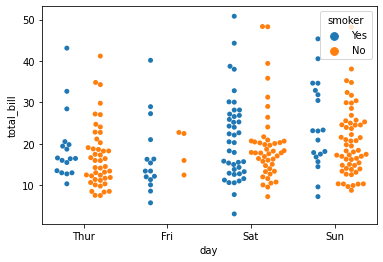